In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import ast
from itertools import zip_longest

In [2]:
def get_llm_ratings(llm_rating_sources: list[str]) -> dict[str, float]:
    llm_ratings = {}

    all_ratings = {}
    for source in llm_rating_sources:
        source = f"{os.path.dirname(os.path.abspath(os.getcwd()))}/../outputs/{source}"
        for root, _, files in os.walk(source):
            for file in files:
                if file.endswith(".csv"):
                    file_path = os.path.join(root, file)
                    df = pd.read_csv(file_path)
                    for index, row in df.iterrows():
                        name = row['experiment_name'] + ", " + row['version']
                        response = row["response"]

                        response = ast.literal_eval(response)
                        question = "1"
                        rating = 0
                        if question in response:
                            rating = response["1"]
                        else:
                            continue

                        if name not in all_ratings:
                            all_ratings[name] = []
                        all_ratings[name].append(rating)
    
    for key, value in all_ratings.items():
        llm_ratings[key] = sum(value) / len(value)
    
    return llm_ratings

In [3]:
human_ratings = { # Standard suspense / Q2 ratings
    "Experiment A, Pen Not Mentioned": (3.78 + 3.43) / 2,
    "Experiment A, Pen Mentioned Removed": (4.38 + 4.06) / 2,
    "Experiment A, Pen Mentioned Not Removed": 3.47,
    "Experiment B, Unused Comb": 3.96,
    "Experiment B, Used Comb": 3.41,
    "Experiment C, Prior Solution Not Mentioned": (3.76 + 3.34) / 2,
    "Experiment C, Prior Solution Mentioned and Removed": (4.61 + 3.99) / 2,
    "Experiment C, Prior Solution Mentioned Not Removed": 4.14
}
# human_ratings = { # Alternate suspense / Q2 ratings
#     "Experiment A, Pen Not Mentioned": 3.40,
#     "Experiment A, Pen Mentioned Removed": 3.95,
#     "Experiment A, Pen Mentioned Not Removed": 0, # n/a
#     "Experiment B, Unused Comb": 0, # n/a
#     "Experiment B, Used Comb": 0, # n/a
#     "Experiment C, Prior Solution Not Mentioned": 3.40,
#     "Experiment C, Prior Solution Mentioned and Removed": 3.91,
#     "Experiment C, Prior Solution Mentioned Not Removed": 0 # n/a
# }

In [7]:
llm_rating_sources1 = ["gerrig_experiment/final/e1"]
llm_ratings1 = get_llm_ratings(llm_rating_sources1)
llm_rating_sources2 = ["gerrig_experiment/final/e2"]
llm_ratings2 = get_llm_ratings(llm_rating_sources2)
llm_rating_sources3 = ["gerrig_experiment/final/e3"]
llm_ratings3 = get_llm_ratings(llm_rating_sources3)
average_list = llm_ratings1
print(llm_ratings1)
for exp in llm_ratings1.keys():
    average_list[exp] += llm_ratings2[exp]+llm_ratings3[exp]
    average_list[exp]= llm_ratings1[exp] /3
print(average_list)


{'Experiment A, Pen Mentioned Not Removed': 6.0, 'Experiment A, Pen Mentioned Removed': 5.9, 'Experiment A, Pen Not Mentioned': 5.9, 'Experiment B, Unused Comb': 6.0, 'Experiment B, Used Comb': 5.9, 'Experiment C, Prior Solution Mentioned and Removed': 6.1, 'Experiment C, Prior Solution Mentioned Not Removed': 5.9, 'Experiment C, Prior Solution Not Mentioned': 5.8}
{'Experiment A, Pen Mentioned Not Removed': 6.0, 'Experiment A, Pen Mentioned Removed': 5.896296296296296, 'Experiment A, Pen Not Mentioned': 5.896296296296296, 'Experiment B, Unused Comb': 6.0, 'Experiment B, Used Comb': 5.859259259259258, 'Experiment C, Prior Solution Mentioned and Removed': 6.103703703703704, 'Experiment C, Prior Solution Mentioned Not Removed': 5.896296296296296, 'Experiment C, Prior Solution Not Mentioned': 5.722222222222222}


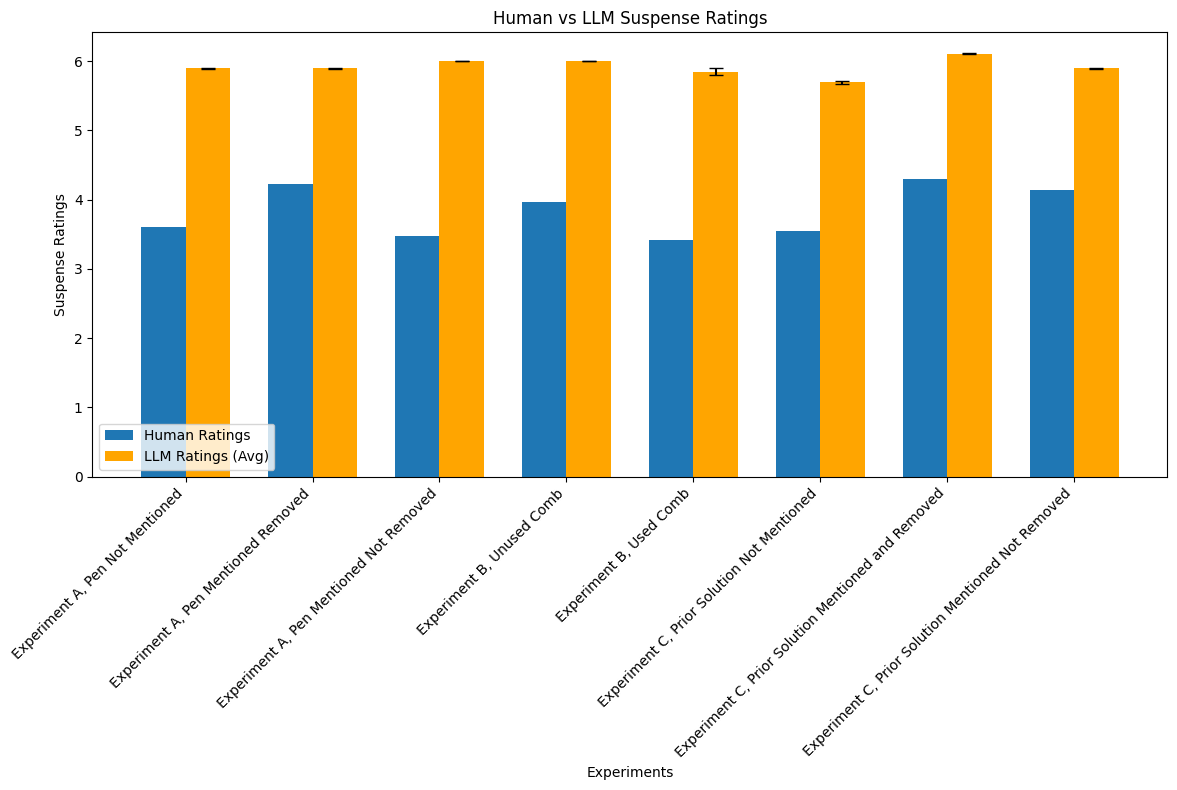

In [8]:
import numpy as np
import matplotlib.pyplot as plt
experiments = list(human_ratings.keys())
llm_values1 = [llm_ratings1.get(exp, 0) for exp in experiments]
llm_values2 = [llm_ratings2.get(exp, 0) for exp in experiments]
llm_values3 = [llm_ratings3.get(exp, 0) for exp in experiments]
human_values = [human_ratings.get(exp, 0) for exp in experiments]

llm_means = np.mean([llm_values1, llm_values2, llm_values3], axis=0)
llm_stds = np.std([llm_values1, llm_values2, llm_values3], axis=0)
bar_width = 0.35
index = np.arange(len(experiments))
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(index, human_values, bar_width, label='Human Ratings')
ax.bar(index + bar_width, llm_means, bar_width, yerr=llm_stds, capsize=5, label='LLM Ratings (Avg)', color='orange')
ax.set_xlabel('Experiments')
ax.set_ylabel('Suspense Ratings')
ax.set_title('Human vs LLM Suspense Ratings')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(experiments, rotation=45, ha='right', fontsize=10)
ax.legend()
plt.tight_layout()
plt.show()

/var/folders/b8/hh_tszlx6f1fqhbpg12l2zkh0000gn/T/ipykernel_28515/1015916290.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


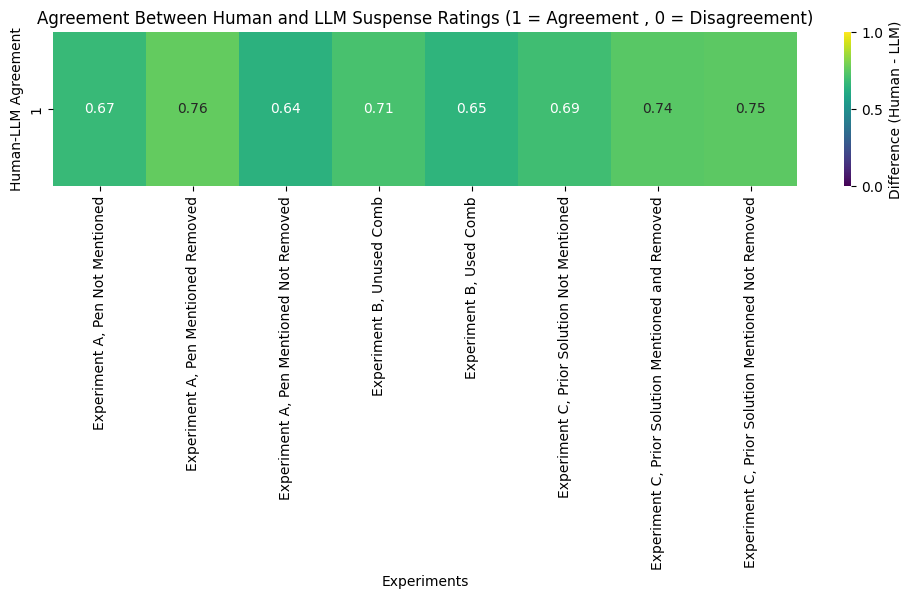

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

experiments = list(human_ratings.keys())
llm_values1 = [llm_ratings1.get(exp, 0) for exp in experiments]
llm_values2 = [llm_ratings2.get(exp, 0) for exp in experiments]
llm_values3 = [llm_ratings3.get(exp, 0) for exp in experiments]
human_values = [human_ratings.get(exp, 0) for exp in experiments]

llm_means = np.mean([llm_values1, llm_values2, llm_values3], axis=0)

differences = []
for i in range(len(llm_means)):
    diff_llm = abs(llm_means[i] - human_values[i])
    similarity = 1 - (diff_llm / 7)
    differences.append(similarity)
heatmap_data = np.zeros((1, len(experiments)))
for i in range(len(differences)):
    heatmap_data[0, i] = differences[i] 


plt.figure(figsize=(12, 2))
sns.heatmap(heatmap_data, annot=True, cmap="viridis", cbar_kws={'label': 'Difference (Human - LLM)', 'ticks': [0, 0.5, 1]}, xticklabels=experiments, yticklabels=["1"], cbar=True, vmin=0, vmax=1)
plt.xlabel('Experiments')
plt.ylabel('Human-LLM Agreement')
plt.title('Agreement Between Human and LLM Suspense Ratings (1 = Agreement , 0 = Disagreement)')
plt.tight_layout()
plt.show()


In [10]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# experiments = list(human_ratings.keys())
# llm_values1 = [llm_ratings1.get(exp, 0) for exp in experiments]
# llm_values2 = [llm_ratings2.get(exp, 0) for exp in experiments]
# llm_values3 = [llm_ratings3.get(exp, 0) for exp in experiments]
# human_values = [human_ratings.get(exp, 0) for exp in experiments]

# llm_means = np.mean([llm_values1, llm_values2, llm_values3], axis=0)
# mean = 3.5
# differences = []

# for i in range(0, len(llm_means)):
#     diff_llm = llm_means[i] - mean
#     diff_human = human_values[i] - mean
    
#     if diff_llm > 0:
#         differences.append(1)
#     elif diff_llm == 0:
#         differences.append(0.5)
#     else:
#         differences.append(0)

# heatmap_data = np.zeros((2, len(experiments))) 
# for i, diff in enumerate(differences):
#     heatmap_data[1, i] = diff
#     if diff_human > 0:
#         heatmap_data[0, i] = 1
#     elif diff_human == 0:
#         heatmap_data[0, i] = 0.5
#     else:
#         heatmap_data[1, i] = 0
# plt.figure(figsize=(12, 4))
# sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", cbar_kws={'label': 'Suspenseful or not', 'ticks': [0, 0.5, 1]}, 
#             xticklabels=experiments, yticklabels=["Human", "LLM"], cbar=True, vmin=0, vmax=1, linewidths=0.5)
# plt.xlabel('Experiments')
# plt.ylabel('Human & LLM')
# plt.title('Suspense characteristic of the Experiments')
# plt.tight_layout()
# plt.show()


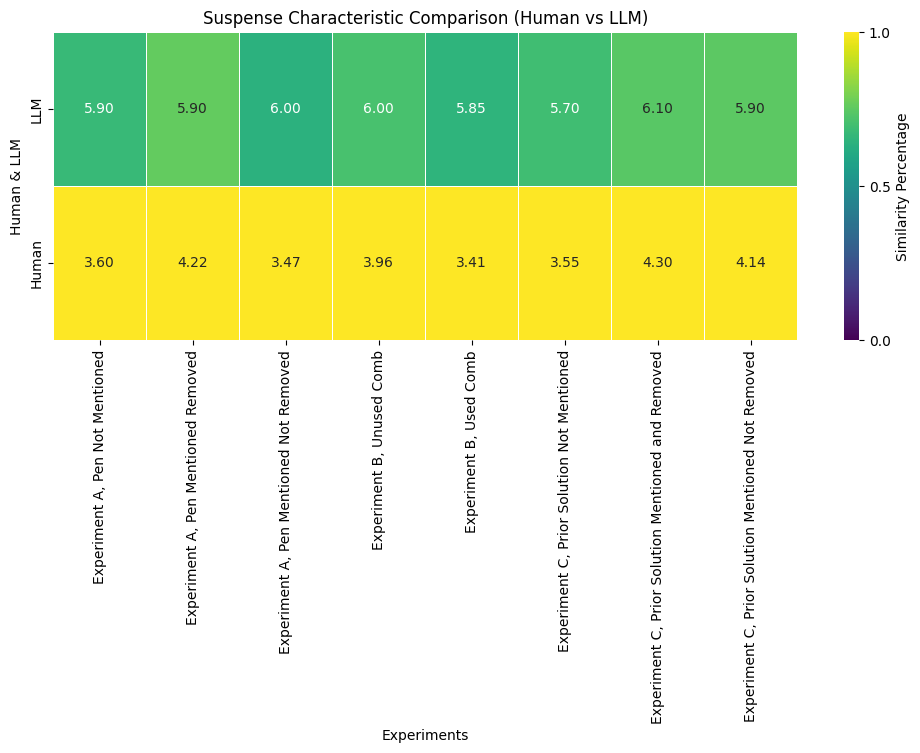

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

experiments = list(human_ratings.keys())

llm_values1 = [llm_ratings1.get(exp, 0) for exp in experiments]
llm_values2 = [llm_ratings2.get(exp, 0) for exp in experiments]
llm_values3 = [llm_ratings3.get(exp, 0) for exp in experiments]
human_values = [human_ratings.get(exp, 0) for exp in experiments]

llm_means = np.mean([llm_values1, llm_values2, llm_values3], axis=0)

differences = []
for i in range(len(llm_means)):
    diff_llm = abs(llm_means[i] - human_values[i])
    similarity = 1 - (diff_llm / 7)
    differences.append(similarity)

heatmap_data = np.zeros((2, len(experiments)))
for i in range(len(differences)):
    heatmap_data[0, i] = differences[i] 
    heatmap_data[1, i] = 100

annot_data = np.array([[round(llm_means[i], 2) for i in range(len(experiments))],
                       [human_values[i] for i in range(len(experiments))]])
plt.figure(figsize=(12, 4))
sns.heatmap(
    heatmap_data,
    annot=annot_data, 
    fmt=".2f",
    cmap="viridis",
    cbar_kws={'label': 'Similarity Percentage', 'ticks': [0, 0.5, 1]},
    xticklabels=experiments,
    yticklabels=["LLM", "Human"],
    cbar=True,
    vmin=0,
    vmax=1,
    linewidths=0.5
)
plt.xlabel('Experiments')
plt.ylabel('Human & LLM')
plt.title('Suspense Characteristic Comparison (Human vs LLM)')
plt.show()
